In [13]:
import pandas as pd  # 读取csv文件
import matplotlib.pyplot as plt  # 画图
from wordcloud import WordCloud  # 词云图

In [14]:
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [15]:
# 
# 读取csv数据
df = pd.read_csv('2022胡润百富榜.csv')
# df.shape, df.head(), df.describe()

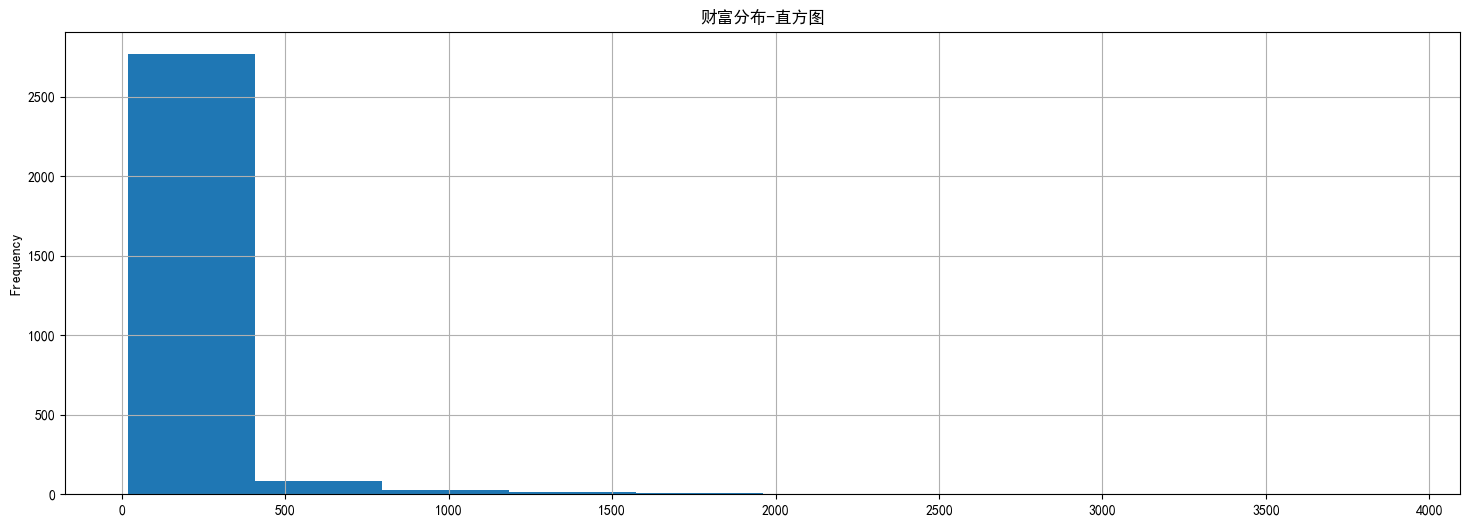

In [16]:
df_Wealth = df['财富值_人民币_亿']
# 绘图
df_Wealth.plot.hist(figsize=(18, 6), grid=True, title='财富分布-直方图')
# 保存图片
plt.savefig('财富分布-直方图.png')
# 横轴是人数，纵轴是财富值

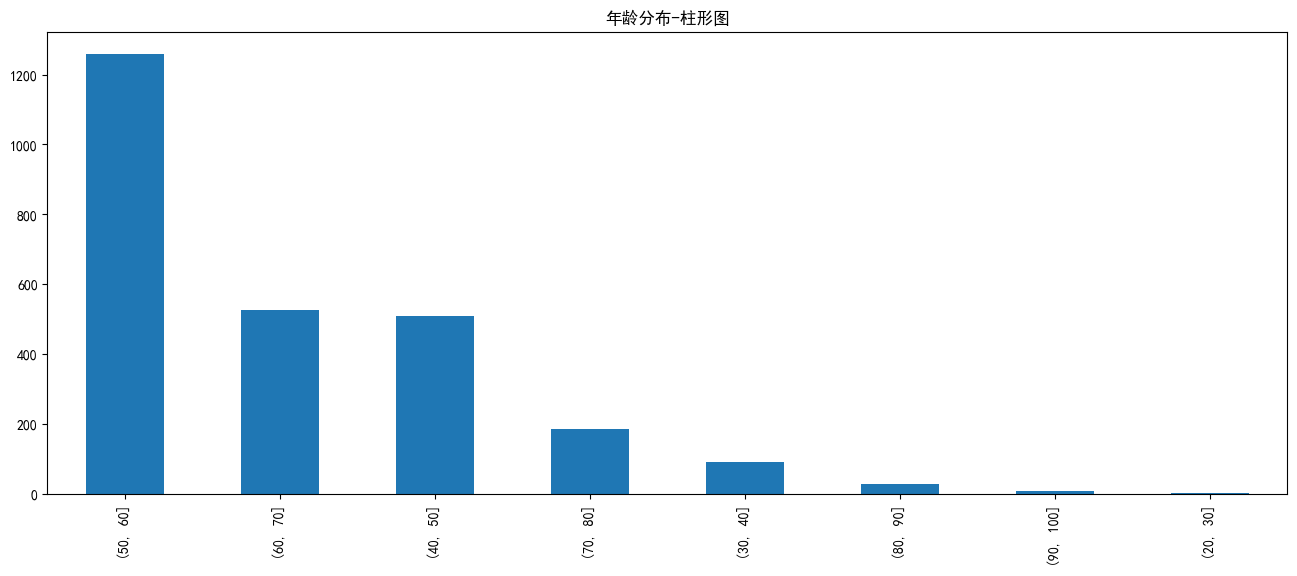

In [17]:
# 剔除未知
df_Age = df[df.年龄 != '未知']
# 数据切割，8个分段
df_Age_cut = pd.cut(df_Age.年龄.astype(float), bins=[20, 30, 40, 50, 60, 70, 80, 90, 100])
# 画柱形图
df_Age_cut.value_counts().plot.bar(figsize=(16, 6), title='年龄分布-柱形图')
# 保存图片
plt.savefig('年龄分布-柱形图.png')

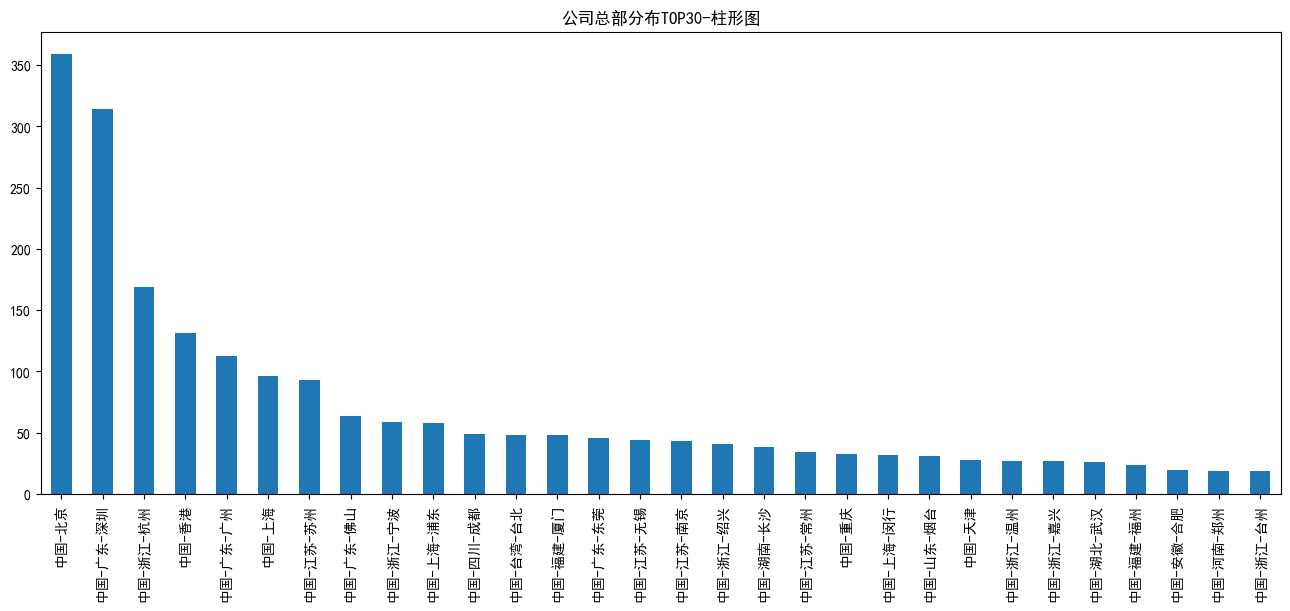

In [18]:
df_ComHeadquarters = df['公司总部地_中文'].value_counts()
# 绘图
df_ComHeadquarters.nlargest(n=30).plot.bar(
    figsize=(16, 6),  # 图片大小
    grid=False,  # 显示网格
    title='公司总部分布TOP30-柱形图'  # 图片标题
)
# 保存图片
plt.savefig('公司总部分布TOP30-柱形图.png')

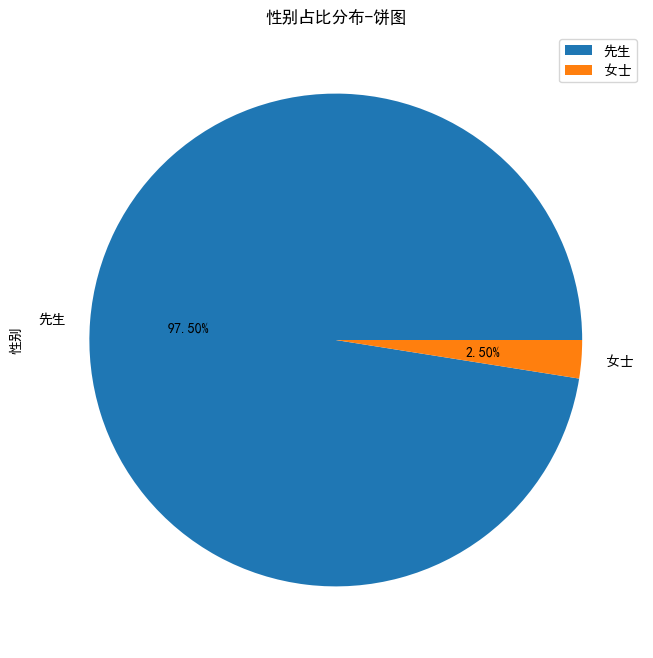

In [19]:
df_Gender = df['性别'].value_counts()
# 绘图
df_Gender.plot.pie(
    figsize=(8, 8),  # 图片大小
    legend=True,  # 显示图例
    autopct='%1.2f%%',  # 百分比格式
    title='性别占比分布-饼图',  # 图片标题
)
# 保存图片
plt.savefig('性别占比分布-饼图.png')

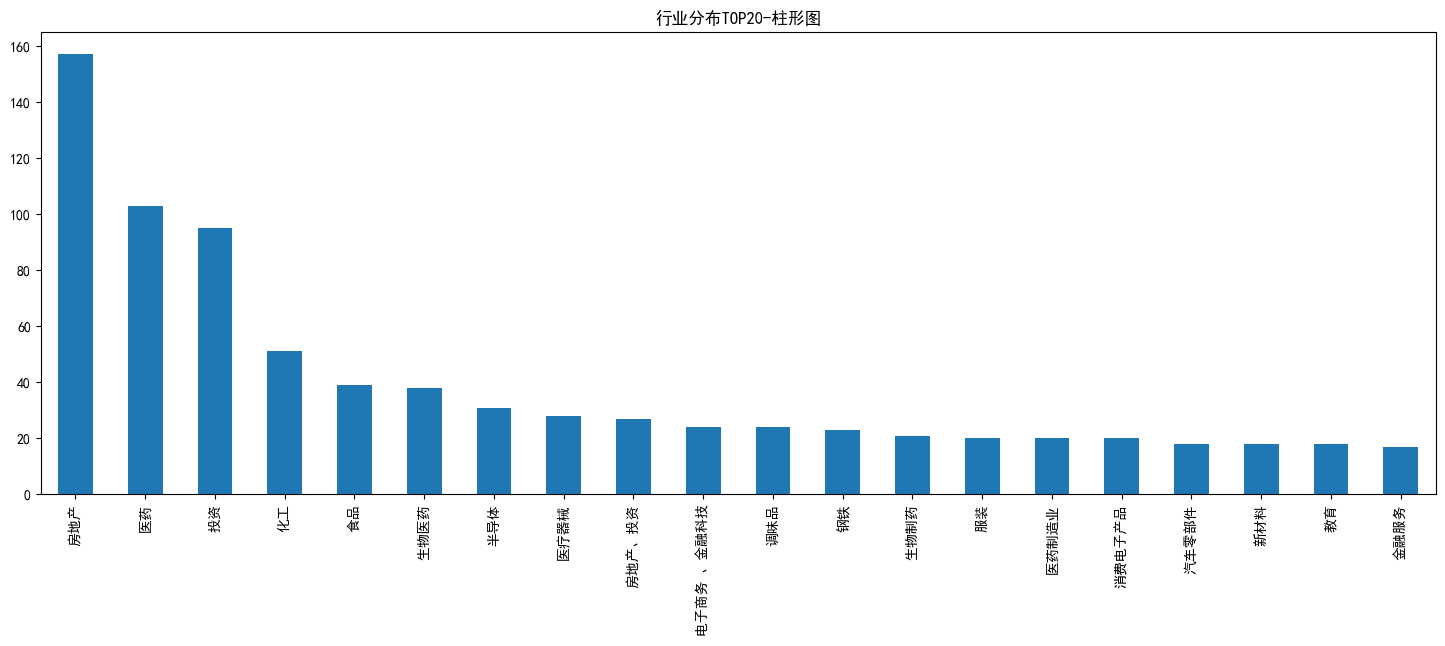

In [20]:
df_Industry = df['所在行业_中文'].value_counts()
df_Industry.nlargest(n=20).plot.bar(
    figsize=(18, 6),  # 图片大小
    grid=False,  # 显示网格
    title='行业分布TOP20-柱形图'  # 图片标题
)
# 保存图片
plt.savefig('行业分布TOP20-柱形图.png')

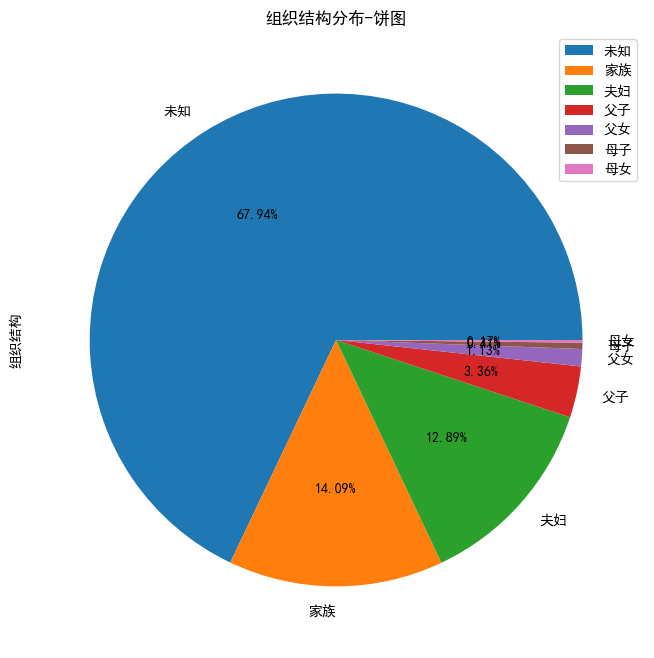

In [21]:
df_Relations = df['组织结构'].value_counts()
# 绘图
df_Relations.plot.pie(
    figsize=(8, 8),  # 图片大小
    legend=True,  # 显示图例
    autopct='%1.2f%%',  # 百分比格式
    title='组织结构分布-饼图',  # 图片标题
)
# 保存图片
plt.savefig('组织结构分布-饼图.png')

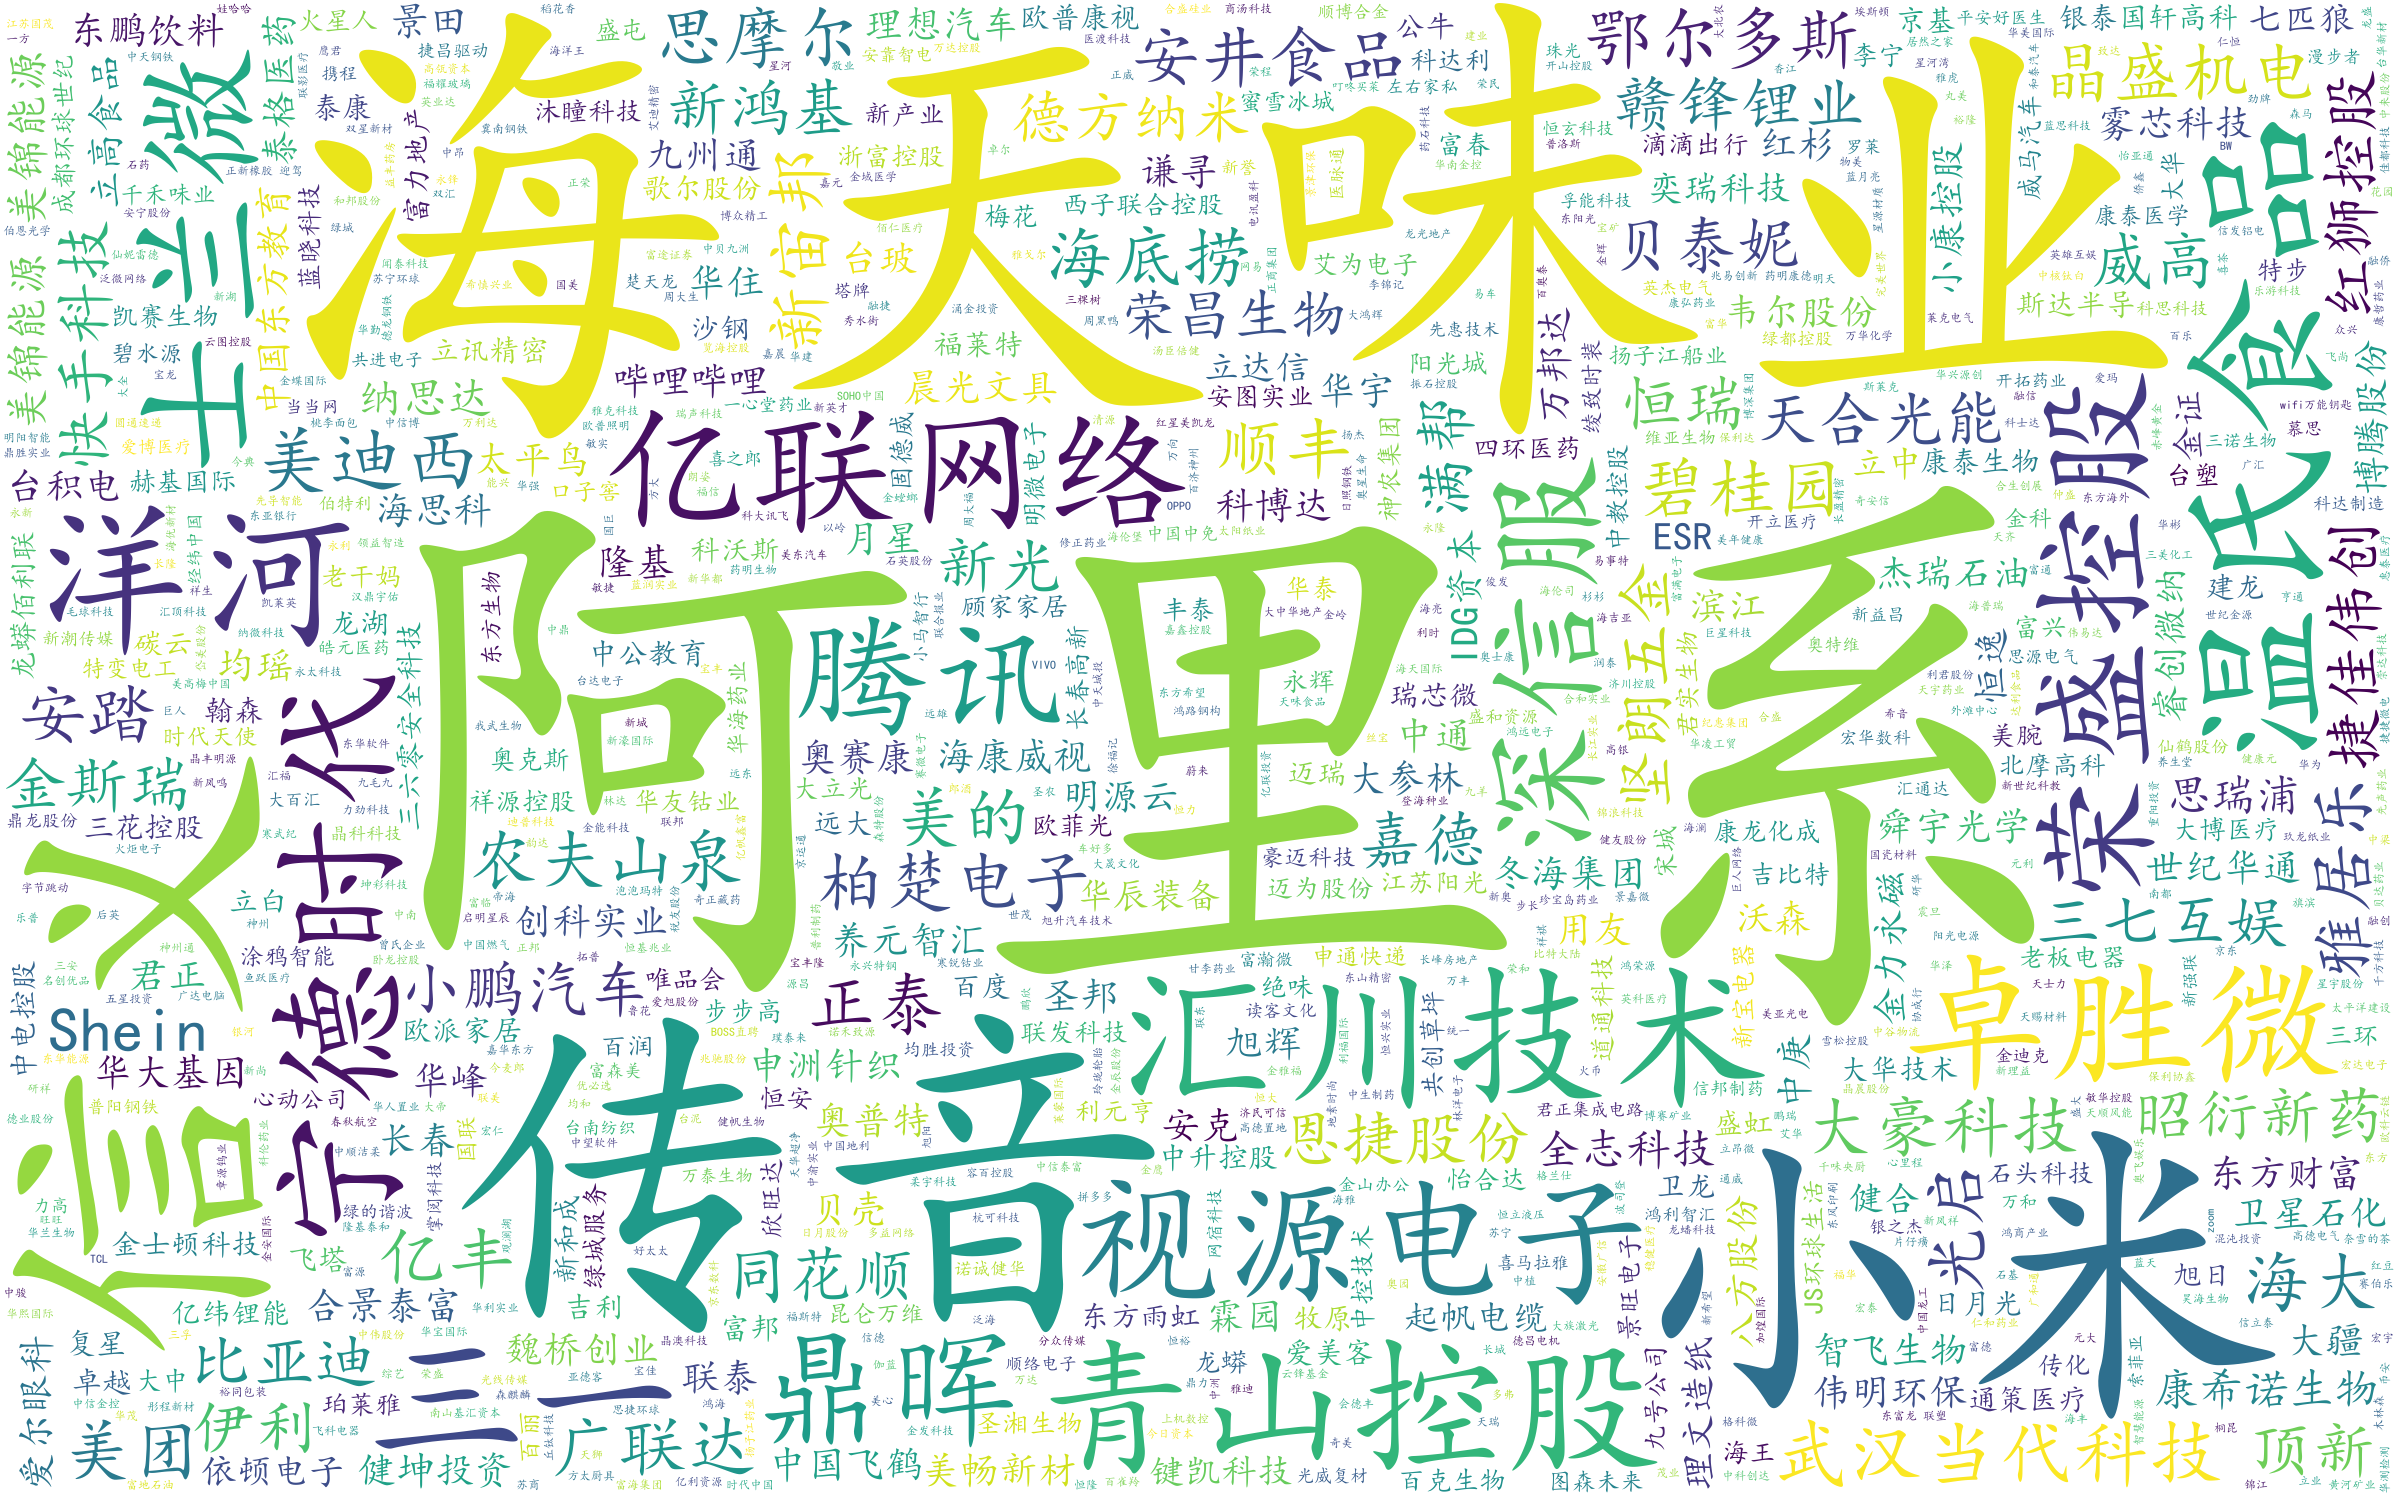

In [27]:
ComName_list = df['公司名称_中文'].values.tolist()
ComName_str = ' '.join(ComName_list)
stopwords = []  # 停用词
font = "C:\\Windows\\Fonts\\simkai.TTF"#词云的中文字体所在路径
wc = WordCloud(
    scale=3,  # 清晰度
    background_color="white",  # 背景颜色
    max_words=1000,#最大字符数
    width=800,  # 图宽
    height=500,  # 图高
    font_path= font,  # 字体文件路径，根据实际情况替换
    stopwords=stopwords,  # 停用词
)
wc.generate_from_text(ComName_str)  # 生成词云图
wc.to_file('2022胡润百富榜_公司名称_词云图.png')  # 保存图片
wc.to_image()  # 显示图片